<a href="https://colab.research.google.com/github/RanOvadia/image-processing/blob/main/Summery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Week 1
import numpy as np
from skimage import io # io is an input output module, as part of skimage
from matplotlib import pyplot as plt
from google.colab import drive

# Week 2
import cv2 # Another module to play with images
import glob # Module that finds all the paths names
from skimage import img_as_float # Converting img to float values (normlized)
from spectral import imshow, view_cube, ndvi # Hyperspectral images
import spectral.io.envi as envi # Opening RAW and HDR

# Week 3
import os # Operating system
import requests # request image from web
import shutil # to save the image locally

# Week 4
import scipy.ndimage as ndi
from skimage import data # Is used for showing stock photos from skimage library
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

# Week 1

## Reading

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


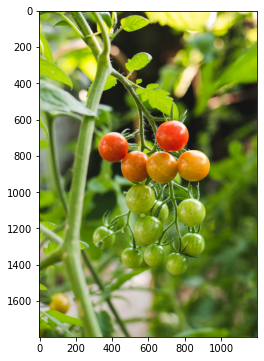

In [ ]:
drive.mount('/content/drive') # Access the drive 
folder_path = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class01' # Defining a working folder, using a variable
image_tomato = io.imread(fname = f'{folder_path}/images/tomato.jpg') # Reading the img with io module
plt.figure(figsize = (4,6)) # Defining a figure size (width,height)
plt.imshow(image_tomato) # Displaying the img with plt module


## Info

In [ ]:
[image_tomato.shape, image_tomato.min(), image_tomato.max(), image_tomato.dtype] # a simple list with some info regarding the image

[(1798, 1200, 3), 0, 255, dtype('uint8')]

## Clipping and color Layers

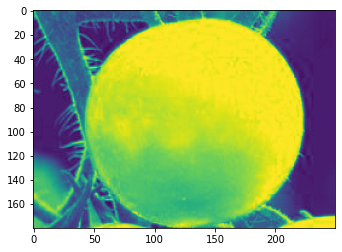

In [ ]:
clipped_tomato = image_tomato[600:780, 600:850,0]
plt.imshow(clipped_tomato) # first y, and then x, and then red channel (0)

## Saving

In [ ]:
folder_path = r'/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Ran.Ovadia/HW03'
io.imsave(fname = f'{folder_path}/images/tomato_clipped_27102022.jpg', arr=clipped_tomato) 

# Week 2

## Subplots

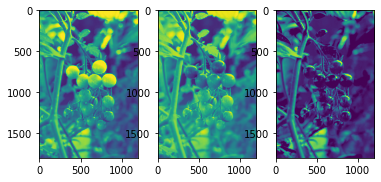

In [ ]:
red = image_tomato[:,:,0]
green = image_tomato[:,:,1]
blue = image_tomato[:,:,2]

plt.subplot(1,3,1) # subplots for showing img on grids (1x3, spot 1)
plt.imshow(red) # cmap for colourmap

plt.subplot(1,3,2) # subplots for showing img on grids (1x3, spot 2)
plt.imshow(green) 

plt.subplot(1,3,3) # subplots for showing img on grids (1x3, spot 3)
plt.imshow(blue) 

##Stacking

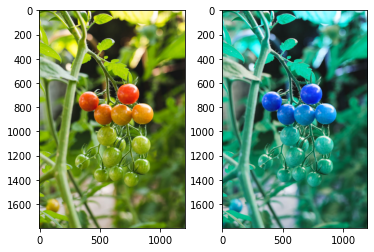

In [ ]:
stacked = np.stack((red,green,blue),axis=-1)
plt.subplot(1,2,1)
plt.imshow(stacked)

revese_stacked = np.stack((blue,green,red),axis=-1)
plt.subplot(1,2,2)
plt.imshow(revese_stacked)

## Splitting (CV2)

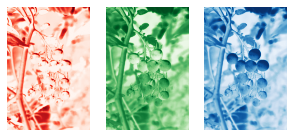

In [ ]:
b,g,r = cv2.split(image_tomato)

plt.figure(figsize=(5,5))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(r, cmap='Reds')
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(g, cmap='Greens')
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(b, cmap='Blues')

## Merging (CV2)

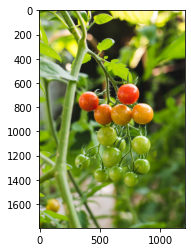

In [ ]:
merged_image = cv2.merge([b, g, r]) # notice that we merged to BGR and not RGB
plt.imshow(merged_image) # RGB image

## HyperSpectral layerz

In [ ]:
!pip install spectral # a library for reading hyperspectral images

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# our working folder
folder_path = '/content/drive/MyDrive/71254_2023/01_Lectures/Class02'

# path to the hs files
hdr_path = f"{folder_path}/images/hs"

# these file were obtained from a hyperspectral camera
dark_ref = envi.open(f'{hdr_path}/DARKREF_1341.hdr', f'{hdr_path}/DARKREF_1341.raw')
white_ref = envi.open(f'{hdr_path}/WHITEREF_1341.hdr', f'{hdr_path}/WHITEREF_1341.raw')
data_ref = envi.open(f'{hdr_path}/1341.hdr', f'{hdr_path}/1341.raw')

In [ ]:
# Loading the relevent image and dark + white refrence
white_nparr = np.array(white_ref.load()) 
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

ImageView object:
  Display bands       :  (100, 100, 100)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0030581040773540735, 1.2652438879013062]
    G: [0.0030581040773540735, 1.2652438879013062]
    B: [0.0030581040773540735, 1.2652438879013062]

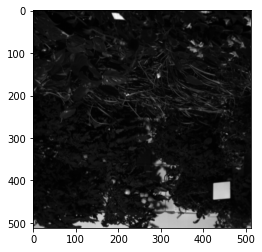

In [ ]:
# using the corretion formula and displaying
corrected_nparr = np.divide(
    np.subtract(data_nparr, dark_nparr),
    np.subtract(white_nparr, dark_nparr))

imshow(corrected_nparr, (100, 100, 100))

In [ ]:
# Read the picture into an array for plotting

bands = np.genfromtxt(f'{hdr_path}/bands.csv', delimiter=',')

In [ ]:
# Function for the reflectance spectrum for a pixel

def plot_pixel(img,pixel_y,pixel_x,bands):

  leaf_pixel = img[
      pixel_y:pixel_y+1,
      pixel_x:pixel_x+1,
      :]

  leaf_pixel_squeezed = np.squeeze(leaf_pixel)

  plt.plot(bands, leaf_pixel_squeezed)
  plt.title('Spectral Footprint\n(Pixel {},{})'.format(
      pixel_x, pixel_y),fontsize=16)
  plt.xlabel('Wavelength',fontsize=14)
  plt.ylabel('Reflectance',fontsize=14)
  plt.show()

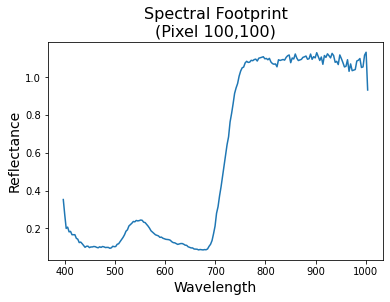

In [ ]:
# Show the plot for pixel (y=100,x=100)
plot_pixel(corrected_nparr, 100, 100, bands)

In [ ]:
# reflectance spectrum for multi pixels

def plot_several_pixel(img,pixels_tuples_array,bands):
  for pixel_xy in pixels_tuples_array:
    leaf_pixel = img[ 
      pixel_xy[0]:pixel_xy[0]+1, #y pixel
      pixel_xy[1]:pixel_xy[1]+1, #x pixel
      :]
    leaf_pixel_squeezed = np.squeeze(leaf_pixel) #squeeze

    plt.plot(bands, leaf_pixel_squeezed, label =f"y={pixel_xy[0]}, x={pixel_xy[1]}"  )
  plt.title('Spectral signature',fontsize=16)
  plt.xlabel('Wavelength',fontsize=14)
  plt.ylabel('Reflectance',fontsize=14)
  plt.legend()

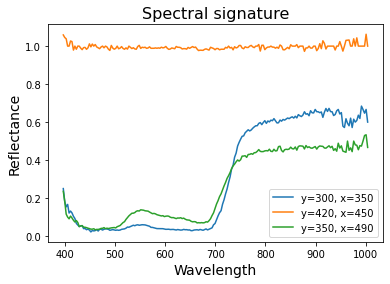

In [ ]:
plot_several_pixel(corrected_nparr,[(300,350),(420,450),(350,490)],bands)

## NDVI

 $$NDVI = \frac{(NIR - RED)}{(NIR + RED)}$$

### hyperspectral image

Text(0.5, 1.0, 'Tomato Wall NDVI \n (RED = Band 87, NIR = Band 140)')

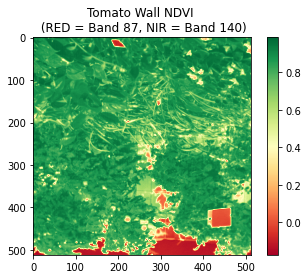

In [ ]:
vi = ndvi(corrected_nparr, 87, 140) # using the ndvi function from spectral to calc, arguments: image, red band number, nir band number
plt.imshow(vi, cmap='RdYlGn') # notice the chosen colormap
plt.colorbar()
plt.title('Tomato Wall NDVI \n (RED = Band 87, NIR = Band 140)')

### security camra image

Text(0.5, 1.0, 'Tomato plants NDVI')

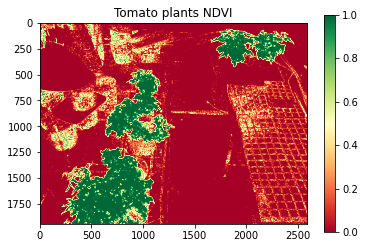

In [ ]:
# reading in images
white_nparr = io.imread(f'{folder_path}/images/ndvi/white_ref.jpg')
dark_nparr = io.imread(f'{folder_path}/images/ndvi/dark_ref.jpg')
data_nparr = io.imread(f'{folder_path}/images/ndvi/rgb.jpg')
nir = io.imread(f'{folder_path}/images/ndvi/nir.jpg')

# loading the first channel from each image
white_nparr = white_nparr[:,:,0]
dark_nparr = dark_nparr[:,:,0]
data_nparr = data_nparr[:,:,0]
nir = nir[:,:,0]

# correcting the original image using the references
corrected_nparr_red = np.divide(
    np.subtract(data_nparr, dark_nparr),
    np.subtract(white_nparr, dark_nparr))

corrected_nparr_nir = np.divide(
    np.subtract(nir, dark_nparr),
    np.subtract(white_nparr, dark_nparr))


nir_channel = corrected_nparr_nir
red_channel = corrected_nparr_red
np.seterr(invalid='ignore') # ignore 0/0 when dividing

# NDVI calculation
NDVI = (nir_channel - red_channel) / (nir_channel + red_channel) # calc manually

# displaying the NDVI
plt.imshow(NDVI > 0.2, cmap='RdYlGn') # notice the chosen colormap
plt.colorbar()
plt.title('Tomato plants NDVI')

## MGVRI (Modified Green Red Vegetation Index)

 $$MGVRI = \frac{(G^2 - R^2)}{(G^2 + R^2)}$$

In [ ]:
np.seterr(invalid='ignore') # ignore 0/0 when dividing

def calc_mgvri (img):
  g = img[:,:,1]
  r = img[:,:,0]
  mgvri = (g*g-r*r)/(g*g+r*r)
  return mgvri

# Dont forget to use img_as_float to normlize first

## Reading multiple images (GLOB)

In [ ]:
folder_path = r'/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Ran.Ovadia/HW02'

path_list = glob.glob(f'{folder_path}/images/*.*') # load file paths from chosen folder into a list
image_list=[]  # Empty list to store images from the folder.
for path in path_list:   # Iterate through each file in the path_list
    img = io.imread(path)  # read each file
    image_list.append(img)  # Create a list of images

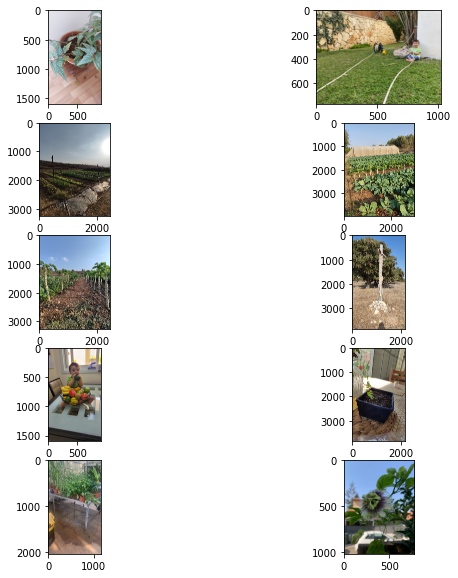

In [ ]:
i=1

plt.figure(figsize=(10,10))
for img in image_list:
  plt.subplot(5, 2, i)
  i = i+1
  plt.imshow(img)

# Week 3

## Create a folder

In [ ]:
# Function to create dir
def createDir(path):
  doesExist = os.path.exists(path) # checks whether the specified path exists
  if not doesExist:
    os.makedirs(path) # create path, since it doesn't exist
    print("The new directory was created!")

In [ ]:
folder_path = r'/content/drive/MyDrive/71254_2023/02_Assignment_Submission/Ran.Ovadia/HW03'
images_path = f'{folder_path}/images' # your folder you want to create!
createDir(images_path)

# lets check that the images folder was actually created
if os.path.exists(images_path):
  print(f'Path: {images_path}\nThe above path exists!')
else:
  print(f'Path: {images_path}\nThe above path does not exist!')

Path: /content/drive/MyDrive/71254_2023/02_Assignment_Submission/Ran.Ovadia/HW03/images
The above path exists!


## Download images

### From a specific URL

In [ ]:
def downloadImageFromURL (url='', destination_image_path=''):

  # The method will take in two parameters, the url variable you created earlier, and stream: True.
  # by adding this second argument in guarantees no interruptions will occur when the method is running.
  res = requests.get(url, stream = True) 

  if res.status_code == 200:
      with open(destination_image_path,'wb') as f:
          shutil.copyfileobj(res.raw, f)
      print('Image sucessfully Downloaded: ', destination_image_path)
  else:
      print('Image Couldn\'t be retrieved')

In [ ]:
# lets download an image of a plant

url_watermelon = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToGHpqiMEfRT8UZlTHbbxL9xpEqqXpTucC7w&usqp=CAU'
path_to_save_image = f'{images_path}/watermelon_plant.jpg'
downloadImageFromURL(url_watermelon, path_to_save_image)

Image sucessfully Downloaded:  /content/drive/MyDrive/71254_2023/02_Assignment_Submission/Ran.Ovadia/HW03/images/watermelon_plant.jpg


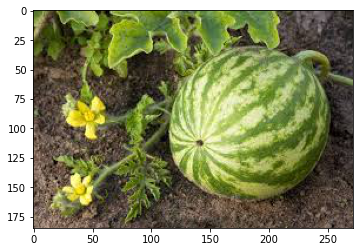

In [ ]:
# lets display the image
watermelon_image = io.imread(path_to_save_image)
plt.imshow(watermelon_image)

### From google image search

In [ ]:
# first uninstall the lib that colab has (enter 'y' to uninstall, and restart runtime)
!pip uninstall google_images_download

# then install the updated library
!pip install git+https://github.com/Joeclinton1/google-images-download.git

Found existing installation: google-images-download 2.8.0
Uninstalling google-images-download-2.8.0:
  Would remove:
    /usr/local/bin/googleimagesdownload
    /usr/local/lib/python3.8/dist-packages/google_images_download-2.8.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/google_images_download/*
Proceed (y/n)? n
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-r3iqex_9
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-r3iqex_9


In [ ]:
# import the newly installed library
from google_images_download import google_images_download

# function to download images from Google Image Search
def downloadImagesFromGoogle(words_to_search='', number_of_imgs=3):

  response = google_images_download.googleimagesdownload() #instantiate the class
  arguments = {"keywords":words_to_search,
              "limit":number_of_imgs,"print_urls":False}
  paths = response.download(arguments)  
  print(paths) #print complete paths to the downloaded images

In [ ]:
# calling our function above (images will be downloaded to the 'downloads' folder on the left)
downloadImagesFromGoogle('weed,cookies', 2)


Item no.: 1 --> Item name = weed
Evaluating...
Starting Download...
Completed Image ====> 1.220724124922-marijuana-stock.jpg
Completed Image ====> 2.3198624e-c54d-458c-bb35b9deced8f27d_source.jpg

Errors: 0


Item no.: 2 --> Item name = cookies
Evaluating...
Starting Download...
Completed Image ====> 1.classic-chocolate-chip-cookies.jpg
Completed Image ====> 2.4bc5edb86285aadc28069f51d9e98974.jpg

Errors: 0

({'weed': ['/content/downloads/weed/1.220724124922-marijuana-stock.jpg', '/content/downloads/weed/2.3198624e-c54d-458c-bb35b9deced8f27d_source.jpg'], 'cookies': ['/content/downloads/cookies/1.classic-chocolate-chip-cookies.jpg', '/content/downloads/cookies/2.4bc5edb86285aadc28069f51d9e98974.jpg']}, 0)


In [ ]:
# lets read the images we downloaded into a list
import glob
weed_paths = glob.glob('/content/downloads/weed/*.*') # get the paths of the watermelon images

# read images into a list
img_list = []
for path in weed_paths:
  img = io.imread(path)
  img_list.append(img)

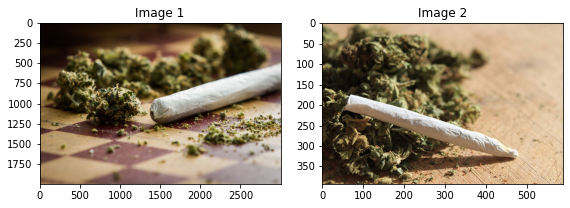

In [ ]:
# displaying the downloaded images
fig, ax=plt.subplots(ncols=len(img_list), nrows=1, figsize=(8, 8))
plt.tight_layout() # nicer layout

# loop to plt.imshow all the images in one row
for i in range(len(img_list)):
  ax[i].imshow(img_list[i])
  ax[i].set_title(f'Image {i+1}')

## Histograms

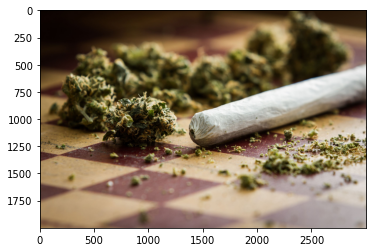

In [ ]:
img = img_list[0]
plt.imshow(img)

### Single Channel

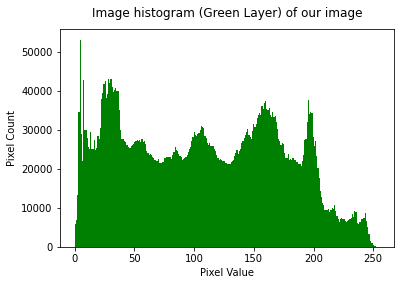

In [ ]:
# using plt to plot a histogram (one channel)

hist_with_plt = plt.hist(img[:,:,1].flatten(), bins = 256, color='g')
plt.title('Image histogram (Green Layer) of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

### Multi channels

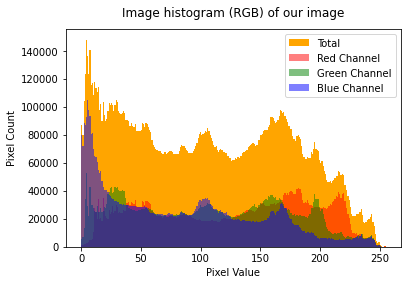

In [ ]:
# using plt to plot a histogram (multi channel)

colors = ('r','g','b') # for the line color

hist = plt.hist(img.flatten(), bins = 256, color = 'orange') # plotting the total histogram

#loop to plot for each channel
for i,color in enumerate(colors):
  hist = plt.hist(img[:, :, i].flatten(), bins = 256, color = color, alpha = 0.5)

# some more details for the figure
plt.title('Image histogram (RGB) of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.legend(['Total', 'Red Channel', 'Green Channel', 'Blue Channel']) # adding a legend
plt.show()

## Opeation on images

### Addition

In [ ]:
folder_path = r'/content/drive/MyDrive/71254_2023/01_Lectures/Class03'

# lets get two images with a black bg
paths_list = glob.glob(f'{folder_path}/images/addition/*.*') # paths to list
images_list = [img_as_float(io.imread(path)) for path in paths_list] # read all images into a list in one line, as float img (normliaze)

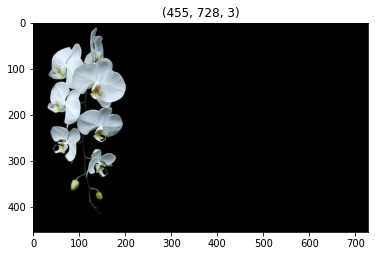

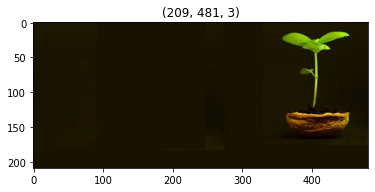

In [ ]:
for img in images_list:
  plt.title(img.shape)
  plt.imshow(img)
  plt.show()

Text(0.5, 1.0, '(209, 481, 3)')

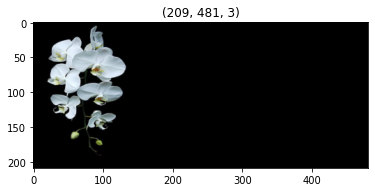

In [ ]:
# resize the large one (2) to the smaller one (1)
resized2 = cv2.resize(images_list[0], (images_list[1].shape[1],images_list[1].shape[0]), interpolation = cv2.INTER_AREA)
plt.imshow(resized2)
plt.title(resized2.shape)

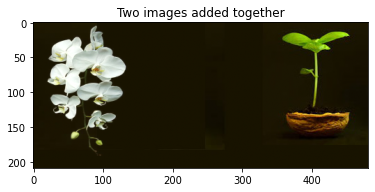

In [ ]:
# adding the images together

if images_list[1].shape == resized2.shape:
  added_img = images_list[1] + resized2
  plt.imshow(added_img)
  plt.title('Two images added together')
else:
  print('Shapes are different, cannot add.')

### Multiplication

In [ ]:
# lets download a dark image
downloadImagesFromGoogle('dark picture of cows', 1)


Item no.: 1 --> Item name = dark picture of cows
Evaluating...
Starting Download...
Completed Image ====> 1.cows-in-the-dark4.jpg

Errors: 0

({'dark picture of cows': ['/content/downloads/dark picture of cows/1.cows-in-the-dark4.jpg']}, 0)


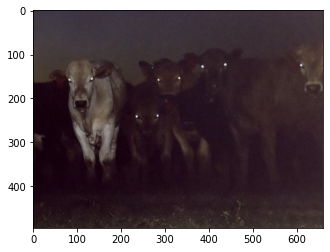

In [ ]:
# read the image and display
dark_img = io.imread('/content/downloads/dark picture of cows/1.cows-in-the-dark4.jpg') # make sure the path is the same as the pic downloaded
dark_img_float = img_as_float(dark_img.copy())
plt.imshow(dark_img_float)

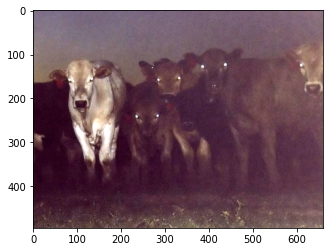

In [ ]:
# lets lighten the image
multiplyed = dark_img_float*2
plt.imshow(multiplyed)

# Week 4

## Mean Filter

This filter is a simple smoothing filter and produces two important results:
1. The intensity of the bright pixel decreased.
2. The intensity of the region near the bright pixel increased.

In [ ]:
# Function for plotting multiple images side by side

def imshow_all(images, titles=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    for ax, img, label in zip(axes.ravel(), images, titles):
        ax.imshow(img, vmin=vmin, vmax=vmax, cmap = 'gray')
        ax.set_title(label)
  

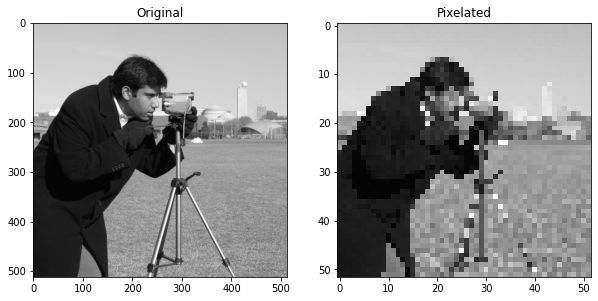

In [ ]:
from skimage import data

image = data.camera() # read in image from the skimage library
pixelated = image[0::10, 0::10] # Using the array[0::10] notation, which only considers every tenth index.

imshow_all([image,pixelated],titles =['Original','Pixelated'])

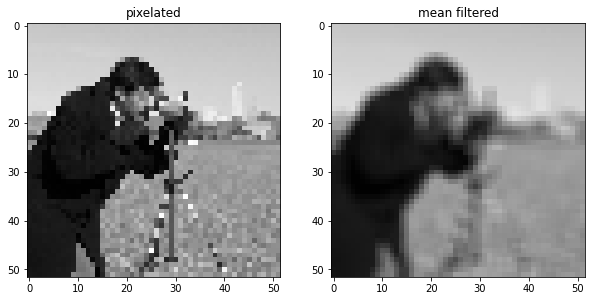

In [ ]:
mean_kernel = np.full((3, 3), 1/9) # defining our mean kernel (3,3) with values of 1/9
mean_filtered = ndi.correlate(pixelated, mean_kernel)
imshow_all([pixelated,mean_filtered], titles=['pixelated', 'mean filtered'])

## Gaussian Filter

The classic image filter is the Gaussian filter. This is similar to the mean filter, in that it tends to smooth images. The Gaussian filter, however, doesn't weight all values in the neighborhood equally. Instead, pixels closer to the center are weighted more than those farther away.

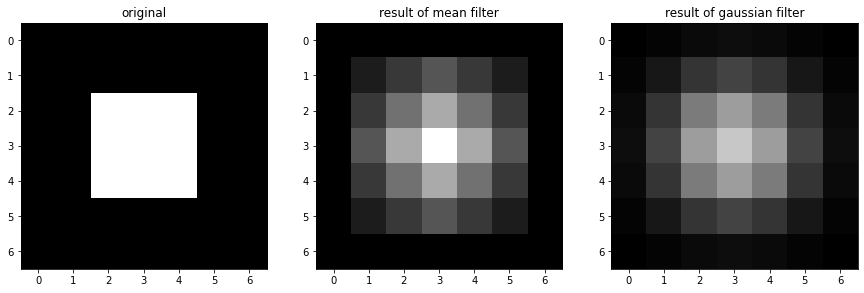

In [ ]:
from skimage import filters

bright_square = np.zeros((7, 7), dtype=float) # create a zero matrix
bright_square[2:5, 2:5] = 1 # change center values to 1

smooth_mean = ndi.correlate(bright_square, mean_kernel) # from above

sigma = 1 # for the gaussian filter
smooth = filters.gaussian(bright_square, sigma)

# displaying the images
imshow_all([bright_square, smooth_mean, smooth],
           titles=['original', 'result of mean filter', 'result of gaussian filter'])

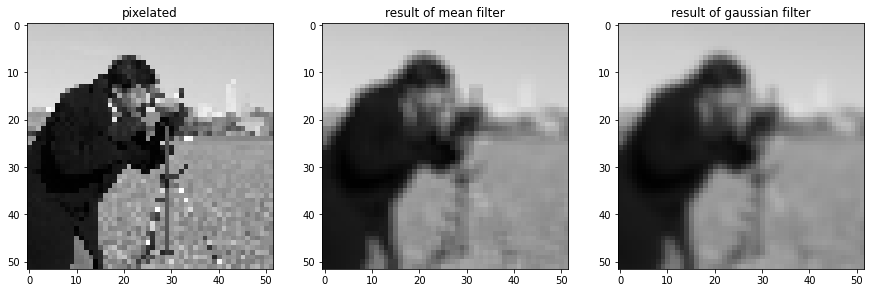

In [ ]:
# The Gaussian filter returns a float image, regardless of input.
# Cast to float so the images have comparable intensity ranges.

pixelated_float = img_as_float(pixelated)
smooth = filters.gaussian(pixelated_float, sigma=1)
imshow_all([pixelated_float,mean_filtered, smooth],titles=['pixelated','result of mean filter' ,'result of gaussian filter'])

**Key Points:**
*   Applying a low-pass blurring filter smooths edges and removes noise from an image.

*   Blurring is often used as a first step before we perform thresholding or edge detection.

*   The Gaussian blur can be applied to an image with the skimage.filters.gaussian() function.

*   Larger sigma values may remove more noise, but they will also remove detail from an image.

## Unsharp Mask (edges enhancer)

Unsharp masking is a linear image processing technique which sharpens the image. The sharp details are identified as a difference between the original image and its blurred version. These details are then scaled, and added back to the original image:

enhanced image = original + amount * (original - blurred)

The blurring step could use any image filter method, e.g. median filter, but traditionally a gaussian filter is used. The radius parameter in the unsharp masking filter refers to the sigma parameter of the gaussian filter.

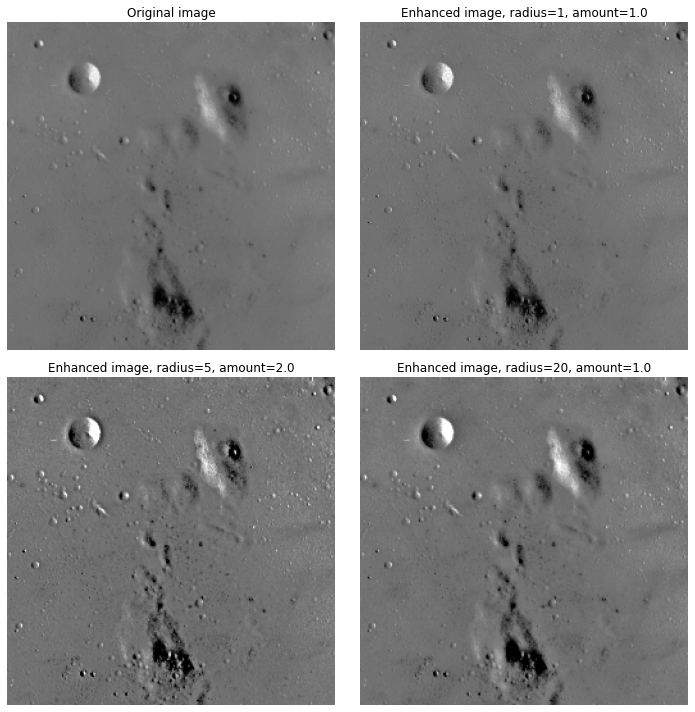

In [ ]:
from skimage.filters import unsharp_mask

image = data.moon()
result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

## Edge Detector (Sobel)

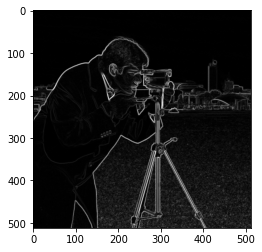

In [ ]:
from skimage.data import camera

image = camera()
edge_sobel = filters.sobel(image)
plt.imshow(edge_sobel,cmap='Greys_r')

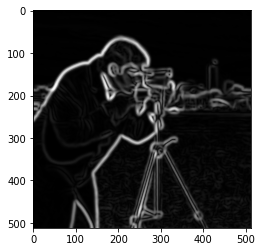

In [ ]:
# Better edge detection on smooth image

smooth = filters.gaussian(image, sigma=3)
edge_sobel_smooth = filters.sobel(smooth)
plt.imshow(edge_sobel_smooth,cmap='Greys_r')

## Canny edge detection

**The Process of Canny edge detection algorithm can be broken down to 5 different steps:**
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges (supplied by the user)
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that
are weak and not connected to strong edges.

# Week 5

## Segmentation by thresholding

### Manual by histogram

In [ ]:
# lets download an image of a stones
url_image = 'https://img.freepik.com/premium-photo/stacked-large-stones-rocks-field-green-grass-rocks-along-remote-hiking-trail-nature-collected-pile-stones-marking-forest-ground-symbolising-small-grave-hiking-trail_590464-75719.jpg?w=2000'
img_path = '/content/rocks.jpg'
downloadImageFromURL(url_image, img_path)

Image sucessfully Downloaded:  /content/rocks.jpg


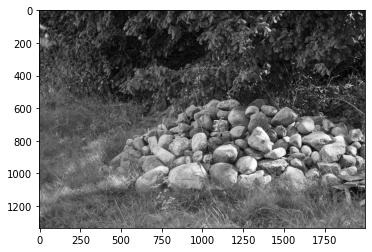

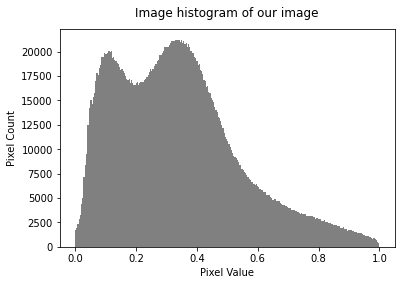

In [ ]:
img = io.imread(img_path, as_gray=True) # read in our image of rocks
plt.imshow(img, cmap='gray')
plt.show()

# show histogram to see which pixel range is good for our rocks
hist_with_plt = plt.hist(img.flatten(), bins = 256, color='gray')
plt.title('Image histogram of our image', y=1.03) # the y makes the title a bit higher
plt.xlabel("Pixel Value")
plt.ylabel("Pixel Count")
plt.show()

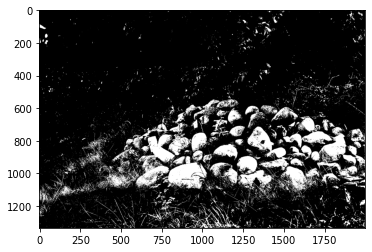

In [ ]:
# Manual thresholding by setting threshold value to numpy array
# After thresholding we will get a binary image.

rocks = (img > 0.55)
plt.imshow(rocks, cmap='gray')

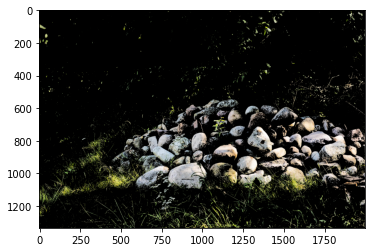

In [ ]:
# display the original image with the mask
rgb_img = io.imread(img_path, as_gray=False) # read in our image of rocks
masked_img = rgb_img.copy()

masked_img[rocks == 0] = 0 # if rocks is False, then zero the pixel in the original image
plt.imshow(masked_img) # display

### Automatic by Otsu

In [ ]:
# lets download an image of a plant
lily_image = 'https://bloximages.chicago2.vip.townnews.com/apg-wi.com/content/tncms/assets/v3/editorial/c/01/c01d2c88-c445-11e9-9b84-d700da1a21bb/5d5d94b513b6c.image.jpg'
lily_img_path = '/content/lily.jpg'
downloadImageFromURL(lily_image, lily_img_path)

Image sucessfully Downloaded:  /content/lily.jpg


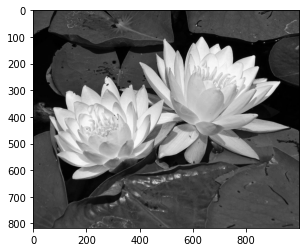

In [ ]:
# read in our image
lily_img = io.imread(lily_img_path, as_gray=True) 
plt.imshow(lily_img, cmap='gray')
plt.show()

Found automatic threshold t= 0.490234375  (125.009765625)



Text(0.5, 1.0, 'Our mask, using skimage+otsu')

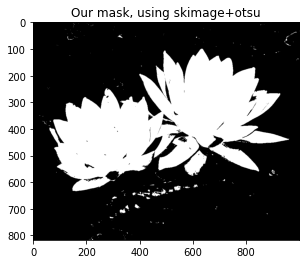

In [ ]:
# perform automatic thresholding
t = filters.threshold_otsu(lily_img)
print("Found automatic threshold t=", t, f' ({255*t})\n')

# create a binary mask with the threshold found by Otsu's method
binary_mask = lily_img > t

# display
plt.imshow(binary_mask, cmap='gray')
plt.title('Our mask, using skimage+otsu')

[0.16210938 0.52539062]


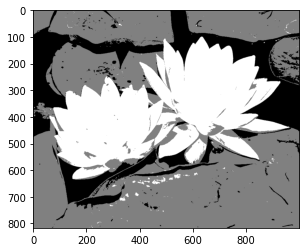

In [ ]:
# Apply multi-Otsu threshold 
from skimage.filters import threshold_multiotsu
thresholds = threshold_multiotsu(lily_img, classes=3)
print(thresholds)

# Digitize (segment) original image into multiple classes.
# np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(lily_img, bins=thresholds)
plt.imshow(regions, cmap='gray')

## Segmentation by texture

## Segmentation by color spaces